In [51]:
#importing required zip file and extracting placed the zip file in the same location of the ipynb file
import os
import zipfile

local_zip = 'cat_dog.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [53]:
#after extracting pointing base directory to data folder
base_dir = 'data'

#initializing training and test paths
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [25]:
#displaying 10 image names of training sets
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['2.jpg', '17.jpg', '15.jpg', '11.jpg', '16.jpg', '14.jpg', '13.jpg', '18.jpg', '7.jpg', '8.jpg']
['1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg']


In [55]:
#total stats of test and training data
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
total_train=len(os.listdir(train_cats_dir))+len(os.listdir(train_dogs_dir))
total_vali=len(os.listdir(validation_cats_dir))+len(os.listdir(validation_dogs_dir))

total training cat images: 20
total training dog images: 20
total validation cat images: 10
total validation dog images: 10


In [56]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

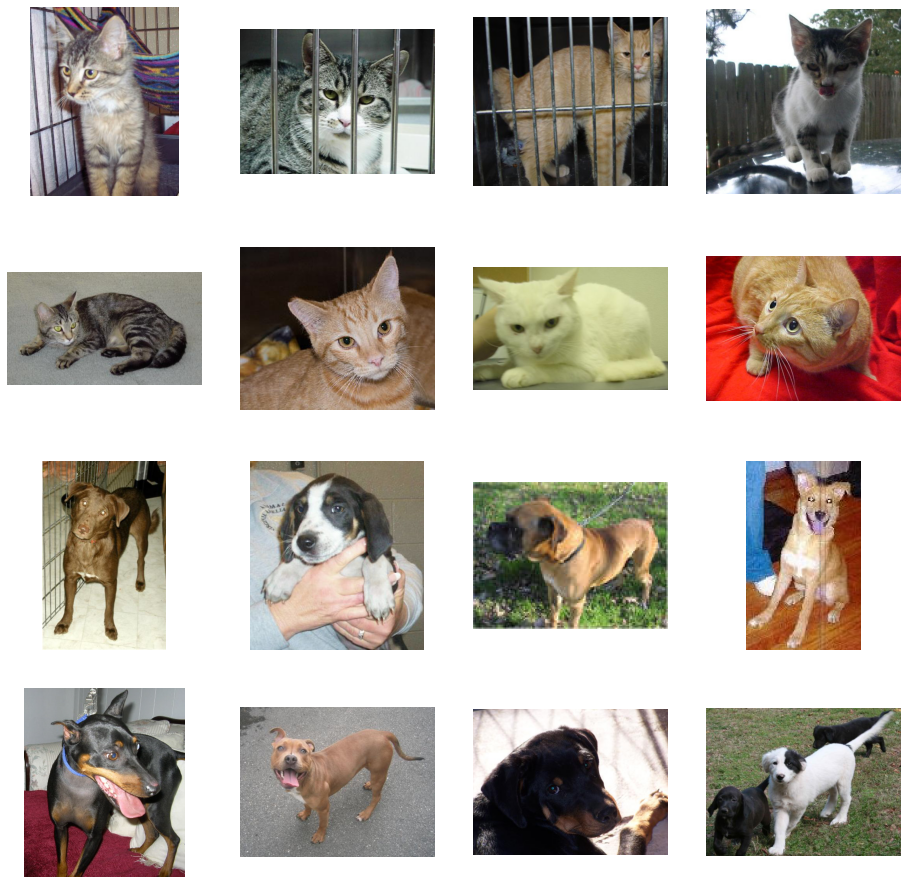

In [57]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [58]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [60]:
#resizing all the files to same size
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=5,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [63]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B as we have resiuzed all the images to 150x150 size
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 32 filters with kernel size 5x5
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32,(5,5),padding='same', activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 64 filters with kernel size 5x5
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64,(5,5),padding='same', activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 32 hidden units
x = layers.Dense(32, activation='relu')(x)

# Add a dropout rate of 0.4
x = layers.Dropout(0.4)(x)

# Create output layer with a single node and softmax activation
output = layers.Dense(1, activation='softmax')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + softmax output layer
model = Model(img_input, output)

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2803

In [46]:
batch_size=5
history = model.fit_generator(
      train_generator,
      steps_per_epoch=total_train//batch_size,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=total_train//batch_size,
      verbose=2)

Epoch 1/15
8/8 - 2s - loss: 7.2434 - accuracy: 0.5250 - val_loss: 8.0058 - val_accuracy: 0.4750
Epoch 2/15
8/8 - 2s - loss: 8.0058 - accuracy: 0.4750 - val_loss: 7.2434 - val_accuracy: 0.5250
Epoch 3/15
8/8 - 2s - loss: 8.7683 - accuracy: 0.4250 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/15
8/8 - 2s - loss: 7.2434 - accuracy: 0.5250 - val_loss: 8.3871 - val_accuracy: 0.4500
Epoch 5/15
8/8 - 2s - loss: 7.2434 - accuracy: 0.5250 - val_loss: 8.3871 - val_accuracy: 0.4500
Epoch 6/15
8/8 - 2s - loss: 7.6246 - accuracy: 0.5000 - val_loss: 6.0997 - val_accuracy: 0.6000
Epoch 7/15
8/8 - 2s - loss: 6.8622 - accuracy: 0.5500 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 8/15
8/8 - 2s - loss: 8.0058 - accuracy: 0.4750 - val_loss: 8.0058 - val_accuracy: 0.4750
Epoch 9/15
8/8 - 2s - loss: 7.6246 - accuracy: 0.5000 - val_loss: 8.7683 - val_accuracy: 0.4250
Epoch 10/15
8/8 - 2s - loss: 8.3871 - accuracy: 0.4500 - val_loss: 7.2434 - val_accuracy: 0.5250
Epoch 11/15
8/8 - 2s - loss: 7.2434 - a

In [47]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 32 filters with kernel size 5x5
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, (5,5),padding='same', activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 64 filters with kernel size 5x5
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, (5,5),padding='same', activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(32, activation='relu')(x)

# Add a dropout rate of 0.4
x = layers.Dropout(0.4)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [48]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2803

In [50]:
batch_size=5
history = model.fit_generator(
      train_generator,
      steps_per_epoch=total_train//batch_size,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=total_train//batch_size,
      verbose=2)

Epoch 1/15
8/8 - 2s - loss: 1.4044 - accuracy: 0.4000 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 2/15
8/8 - 2s - loss: 0.6871 - accuracy: 0.6500 - val_loss: 0.7037 - val_accuracy: 0.4750
Epoch 3/15
8/8 - 2s - loss: 0.7198 - accuracy: 0.5500 - val_loss: 0.6925 - val_accuracy: 0.5500
Epoch 4/15
8/8 - 2s - loss: 0.6889 - accuracy: 0.7250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/15
8/8 - 2s - loss: 0.6620 - accuracy: 0.7250 - val_loss: 0.7542 - val_accuracy: 0.4750
Epoch 6/15
8/8 - 2s - loss: 0.7054 - accuracy: 0.6000 - val_loss: 0.6956 - val_accuracy: 0.4250
Epoch 7/15
8/8 - 2s - loss: 0.6313 - accuracy: 0.7000 - val_loss: 0.6907 - val_accuracy: 0.4000
Epoch 8/15
8/8 - 2s - loss: 0.5781 - accuracy: 0.8000 - val_loss: 0.7512 - val_accuracy: 0.4500
Epoch 9/15
8/8 - 2s - loss: 0.6154 - accuracy: 0.7000 - val_loss: 0.6945 - val_accuracy: 0.5500
Epoch 10/15
8/8 - 2s - loss: 0.4627 - accuracy: 0.8750 - val_loss: 0.7775 - val_accuracy: 0.5000
Epoch 11/15
8/8 - 2s - loss: 0.3806 - a

In [ ]:
#we can see that when sigmoid is applied we are getting an accuracy of 92% , when softmax is applied we are getting highest of 57% accuracy